In [3]:
## Necessary packages
import numpy as np
import pandas as pd
import itertools
import math
import time
import os
import glob
import copy

## Signal Processing
from scipy import signal
import scipy.io.wavfile as wavfile
import scipy.io
import librosa
# from scipy.fftpack import fft
# import adaptfilt as adf


## Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

## Initialization
import IPython.display as ipd
import librosa.display
py.init_notebook_mode(connected=True)
%matplotlib inline

In [8]:
audio_path = 'input/'
# audio_transformation_path = 'output/20190905/'
filename = 'v5.wav'

In [11]:
def read_audio(path, file_name):
    '''
    Read files from specified path (relative or absolute)
    
    Parameters:
    path (string): relative path to read file
    file_name (string): name of file located in path we want to read

    Returns:
    tuple: rate and date of wav file
    
    '''
    rate, data = wavfile.read(str(path) + str(filename))
    # data, rate = librosa.load(str(path) + str(filename))
    data = data.astype('float32')
    return rate, data

def write_audio(path, filename,  rate, data, volume = 1):
    '''
    Write files to specified path (relative or absolute) with volume transformation
    
    Parameters:
    path (string): relative path to write file
    file_name (string): name of file we want to save to located path
    rate (int): audio rate
    data (nd.array): the data we want to save
    volume (int): by default it settled 1, which means no transformation

    Returns:
    Boolean: If writing was finished successfully 
    
    '''
    data = copy.deepcopy(data)
    data *= volume
    data = data.astype('int16')
    wavfile.write(str(path) + str(filename), rate, data)
    return True

def compute_power(data, start, end):
    '''
    Compute power of DTS
    
    Parameters:
    data (nd.array): the data for which  we want to calculate power
    start (int): start range
    end (int): end range

    Returns:
    float: the power of specified data 
    
    '''
    data = data[start:end]
    power = np.mean(data**2)
    return power

def plot_waveform(data, start, end):
    '''
    Signal Visualization
    
    Parameters:
    data (nd.array): the data we want to visualize
    start (int): start range
    end (int): end range

    Returns:
    None: just shows the graph  
    
    '''
    data = data[start:end]
    plt.plot(data)
    plt.ylabel('amplitude')
    plt.xlabel('samples')
    plt.show()
    return None

In [15]:
audio_rate, audio_data = read_audio(audio_path, filename)

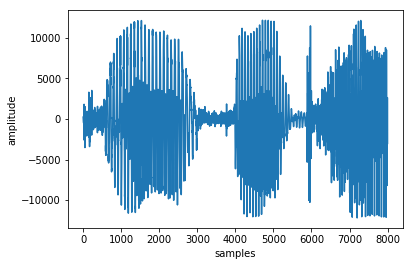

In [16]:
plot_waveform(audio_data, 16000, 24000)

In [17]:
ipd.Audio(audio_data, rate=audio_rate)

In [80]:
sampling_rate = 16000 # 8000 hz  F_s
N = 3 * sampling_rate
omega = np.pi / 10 # klini 800 hz sinusoid
samples = np.array(range(N))
amplitude = 1000
sinusoid = np.sin(omega * samples )

In [67]:
sinusoid = amplitude * sinusoid

In [68]:
ipd.Audio(sinusoid, rate=sampling_rate)

In [41]:
write_audio('output/', 'sinusoid.wav', sampling_rate, sinusoid)

True

In [71]:
coef_no = int(N/2) + 1 # 1-y 0 akanna, qani vor fft-n meka da veradardznelu a 

In [74]:
freqs = np.array(range(coef_no)) * sampling_rate / N

In [75]:
freqs

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       7.99933333e+03, 7.99966667e+03, 8.00000000e+03])

In [86]:
coef = np.fft.rfft(sinusoid)

In [89]:
len(coef)

24001

In [90]:
amplitute_spectre = np.abs(coef)

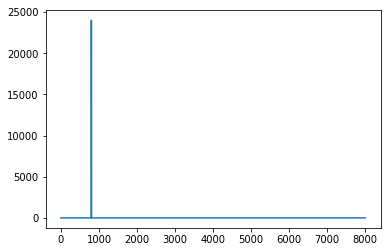

In [93]:
plt.plot(freqs, amplitute_spectre)
plt.show();